In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1.Import Dataset

In [69]:
df = pd.read_csv("C:\\Users\\Yushu gong\\Desktop\\Albert School\\ML-SL\\Final-Project\\company_esg_financial_dataset.csv")

In [70]:
df.tail(5)

,CompanyID,CompanyName,Industry,Region,Year,Revenue,ProfitMargin,MarketCap,GrowthRate,ESG_Overall,ESG_Environmental,ESG_Social,ESG_Governance,CarbonEmissions,WaterUsage,EnergyConsumption
10995,1000,Company_1000,Consumer Goods,Latin America,2021,3419.2,21.7,14416.7,0.4,52.2,67.2,46.3,43.1,498875.8,623594.7,2494378.8
10996,1000,Company_1000,Consumer Goods,Latin America,2022,3518.8,21.4,8078.9,2.9,51.9,68.7,44.7,42.3,506013.7,632517.1,2530068.4
10997,1000,Company_1000,Consumer Goods,Latin America,2023,3417.1,17.1,13263.4,-2.9,52.9,72.4,43.1,43.2,473561.5,591951.9,2367807.7
10998,1000,Company_1000,Consumer Goods,Latin America,2024,3183.2,15.7,6960.1,-6.8,52.0,72.4,40.5,42.9,441310.9,551638.6,2206554.3
10999,1000,Company_1000,Consumer Goods,Latin America,2025,3173.5,17.5,5666.1,-0.3,51.8,74.5,39.7,41.4,430741.6,538427.0,2153707.9


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CompanyID          11000 non-null  int64  
 1   CompanyName        11000 non-null  object 
 2   Industry           11000 non-null  object 
 3   Region             11000 non-null  object 
 4   Year               11000 non-null  int64  
 5   Revenue            11000 non-null  float64
 6   ProfitMargin       11000 non-null  float64
 7   MarketCap          11000 non-null  float64
 8   GrowthRate         10000 non-null  float64
 9   ESG_Overall        11000 non-null  float64
 10  ESG_Environmental  11000 non-null  float64
 11  ESG_Social         11000 non-null  float64
 12  ESG_Governance     11000 non-null  float64
 13  CarbonEmissions    11000 non-null  float64
 14  WaterUsage         11000 non-null  float64
 15  EnergyConsumption  11000 non-null  float64
dtypes: float64(11), int64(

In [72]:
df['Year'].nunique()

11

In [73]:
df['CompanyID'].nunique()

1000

In [74]:
df.describe()

,CompanyID,Year,Revenue,ProfitMargin,MarketCap,GrowthRate,ESG_Overall,ESG_Environmental,ESG_Social,ESG_Governance,CarbonEmissions,WaterUsage,EnergyConsumption
count,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,10000.000000,11000.000000,11000.000000,11000.000000,11000.000000,1.100000e+04,1.100000e+04,1.100000e+04
mean,500.500000,2020.000000,4670.850591,10.900455,13380.622236,4.830370,54.615273,56.416991,55.660582,51.767655,1.271462e+06,5.600442e+05,1.165839e+07
std,288.688113,3.162421,9969.954369,8.758711,39922.870373,9.424787,15.893937,26.767233,23.356152,25.323370,5.067760e+06,1.565686e+06,5.095836e+07
min,1.000000,2015.000000,35.900000,-20.000000,1.800000,-36.000000,6.300000,0.000000,0.000000,0.000000,2.042200e+03,1.021100e+03,5.105500e+03
25%,250.750000,2017.000000,938.775000,5.300000,1098.525000,-1.325000,44.100000,34.700000,37.600000,30.775000,1.228530e+05,6.488467e+04,3.069161e+05
50%,500.500000,2020.000000,1902.300000,10.500000,3096.450000,4.900000,54.600000,55.600000,55.150000,52.100000,2.920734e+05,2.038805e+05,1.221745e+06
75%,750.250000,2023.000000,4342.625000,16.300000,9995.500000,11.000000,65.600000,79.000000,73.800000,73.000000,7.407311e+05,5.251880e+05,5.616437e+06
max,1000.000000,2025.000000,180810.400000,50.000000,865271.700000,38.000000,98.800000,100.000000,100.000000,100.000000,1.741047e+08,5.223142e+07,1.741047e+09


In [75]:
df.groupby('Year')['Industry'].value_counts()

Year  Industry      
2015  Healthcare        121
      Manufacturing     117
      Transportation    117
      Consumer Goods    116
      Finance           113
                       ... 
2025  Finance           113
      Energy            108
      Utilities         107
      Retail            106
      Technology         95
Name: count, Length: 99, dtype: int64

In [76]:
# 按 Year 和 Industry 分组，计算公司数量和 ESG_Overall 平均值
# 先筛选出 2024 年的数据
df_2024 = df[df['Year'] == 2024]

# 按 Industry 分组，统计公司数量和 ESG 平均值
df_grouped = df_2024.groupby('Industry').agg(
    company_count=('CompanyID', 'count'),   # 统计公司数量
    ESG_mean=('ESG_Overall', 'mean')        # 计算 ESG 平均值
).reset_index()

df_grouped


,Industry,company_count,ESG_mean
0,Consumer Goods,116,57.634483
1,Energy,108,51.787963
2,Finance,113,66.506195
3,Healthcare,121,59.696694
4,Manufacturing,117,53.232479
5,Retail,106,58.494340
6,Technology,95,65.515789
7,Transportation,117,48.746154
8,Utilities,107,54.239252


In [77]:
df.groupby('Year')['Region'].value_counts()

Year  Region       
2015  Asia             152
      Oceania          151
      Middle East      147
      Europe           140
      North America    140
                      ... 
2025  Middle East      147
      Europe           140
      North America    140
      Latin America    137
      Africa           133
Name: count, Length: 77, dtype: int64

Select 2023-2024 dataset

In [78]:
# 从 df 中筛选 Year 为 2023 或 2024 的数据
df_2023_2024 = df[df['Year'].isin([2023, 2024])].copy()

In [79]:
df_2023_2024

,CompanyID,CompanyName,Industry,Region,Year,Revenue,ProfitMargin,MarketCap,GrowthRate,ESG_Overall,ESG_Environmental,ESG_Social,ESG_Governance,CarbonEmissions,WaterUsage,EnergyConsumption
8,1,Company_1,Retail,Latin America,2023,636.7,5.3,373.9,7.3,57.8,68.3,27.0,78.1,45956.3,22978.2,91912.6
9,1,Company_1,Retail,Latin America,2024,687.0,4.6,460.1,7.9,58.5,68.9,29.9,76.8,49289.1,24644.5,98578.1
19,2,Company_2,Retail,Asia,2023,3691.6,-0.7,2523.2,18.8,66.0,66.6,61.6,70.0,271015.1,135507.6,542030.3
20,2,Company_2,Retail,Asia,2024,3822.9,-1.2,5807.8,3.6,65.7,65.4,63.0,68.7,283660.0,141830.0,567320.0
30,3,Company_3,Transportation,Latin America,2023,415.2,8.1,498.7,6.6,32.3,20.2,43.8,32.9,263632.1,43938.7,878773.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10976,998,Company_998,Healthcare,Oceania,2024,1838.2,30.5,13081.9,3.5,66.5,100.0,32.3,67.1,91910.8,91910.8,183821.5
10986,999,Company_999,Finance,Asia,2023,5178.3,20.7,12652.4,-3.0,53.6,98.2,19.2,43.4,53102.2,26551.1,132755.5
10987,999,Company_999,Finance,Asia,2024,5464.8,21.5,9851.2,5.5,53.6,98.3,17.7,45.0,55977.4,27988.7,139943.5
10997,1000,Company_1000,Consumer Goods,Latin America,2023,3417.1,17.1,13263.4,-2.9,52.9,72.4,43.1,43.2,473561.5,591951.9,2367807.7


In [ ]:
df_2023_2024 = df_2023_2024.sort_values(by=['CompanyID', 'Year'])

# 计算上一年的 ESG_Overall 和 Revenue
df_2023_2024['ESG_prev_year'] = df_2023_2024.groupby('CompanyID')['ESG_Overall'].shift(1)
df_2023_2024['Revenue_prev_year'] = df_2023_2024.groupby('CompanyID')['Revenue'].shift(1)

# 计算同比变化量
df_2023_2024['ESG_change'] = df_2023_2024['ESG_Overall'] - df_2023_2024['ESG_prev_year']
df_2023_2024['Revenue_change'] = df_2023_2024['Revenue'] - df_2023_2024['Revenue_prev_year']

# 只保留 2024 年的数据
df_2024 = df_2023_2024[df_2023_2024['Year'] == 2024].copy()

# 删除上一年列，如果不需要
df_2024 = df_2024.drop(columns=['ESG_prev_year','Revenue_prev_year'])

# 查看结果
df_2024.head()


,CompanyID,CompanyName,Industry,Region,Year,Revenue,ProfitMargin,MarketCap,GrowthRate,ESG_Overall,ESG_Environmental,ESG_Social,ESG_Governance,CarbonEmissions,WaterUsage,EnergyConsumption,ESG_change,Revenue_change
9,1,Company_1,Retail,Latin America,2024,687.0,4.6,460.1,7.9,58.5,68.9,29.9,76.8,49289.1,24644.5,98578.1,0.7,50.3
20,2,Company_2,Retail,Asia,2024,3822.9,-1.2,5807.8,3.6,65.7,65.4,63.0,68.7,283660.0,141830.0,567320.0,-0.3,131.3
31,3,Company_3,Transportation,Latin America,2024,438.0,10.3,739.4,5.5,32.1,23.4,41.5,31.5,272361.8,45393.6,907872.8,-0.2,22.8
42,4,Company_4,Technology,Africa,2024,6555.1,26.0,45451.6,12.2,63.5,100.0,64.8,25.6,163877.9,98326.7,327755.8,0.9,710.9
53,5,Company_5,Finance,Middle East,2024,3282.1,22.5,9663.0,0.0,47.4,80.4,19.9,41.8,41818.8,20909.4,104546.9,1.5,0.4


In [81]:
df_2024.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 9 to 10998
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CompanyID          1000 non-null   int64  
 1   CompanyName        1000 non-null   object 
 2   Industry           1000 non-null   object 
 3   Region             1000 non-null   object 
 4   Year               1000 non-null   int64  
 5   Revenue            1000 non-null   float64
 6   ProfitMargin       1000 non-null   float64
 7   MarketCap          1000 non-null   float64
 8   GrowthRate         1000 non-null   float64
 9   ESG_Overall        1000 non-null   float64
 10  ESG_Environmental  1000 non-null   float64
 11  ESG_Social         1000 non-null   float64
 12  ESG_Governance     1000 non-null   float64
 13  CarbonEmissions    1000 non-null   float64
 14  WaterUsage         1000 non-null   float64
 15  EnergyConsumption  1000 non-null   float64
 16  ESG_change         1000 non-

In [93]:
df_2024.describe()

,CompanyID,Year,Revenue,ProfitMargin,MarketCap,GrowthRate,ESG_Overall,ESG_Environmental,ESG_Social,ESG_Governance,CarbonEmissions,WaterUsage,EnergyConsumption,ESG_change,Revenue_change
count,1000.000000,1000.0,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000,1000.000000
mean,500.500000,2024.0,6063.939900,10.953200,18874.133700,5.139100,57.176700,60.10560,57.75920,53.671400,1.606672e+06,6.942949e+05,1.468879e+07,0.590200,464.147800
std,288.819436,0.0,13353.933779,10.019794,58072.168482,9.331598,15.721227,26.13136,23.44997,25.436877,7.220099e+06,2.209991e+06,7.249166e+07,1.123078,1450.719058
min,1.000000,2024.0,42.500000,-20.000000,2.000000,-33.900000,12.700000,2.20000,0.00000,0.000000,2.291500e+03,1.145800e+03,5.728800e+03,-2.700000,-3135.100000
25%,250.750000,2024.0,1072.575000,4.400000,1280.075000,-0.300000,47.100000,38.90000,40.10000,32.500000,1.402186e+05,7.949205e+04,3.880880e+05,-0.100000,-6.550000
50%,500.500000,2024.0,2327.100000,10.400000,3982.650000,5.200000,57.500000,60.20000,57.90000,54.450000,3.345778e+05,2.428195e+05,1.445954e+06,0.600000,85.850000
75%,750.250000,2024.0,5774.800000,16.900000,12654.725000,10.900000,68.100000,82.82500,76.00000,74.850000,8.422876e+05,6.184806e+05,6.019102e+06,1.300000,353.725000
max,1000.000000,2024.0,154868.900000,50.000000,865271.700000,36.100000,98.300000,100.00000,100.00000,100.000000,1.569603e+08,4.708809e+07,1.569603e+09,4.300000,17020.500000


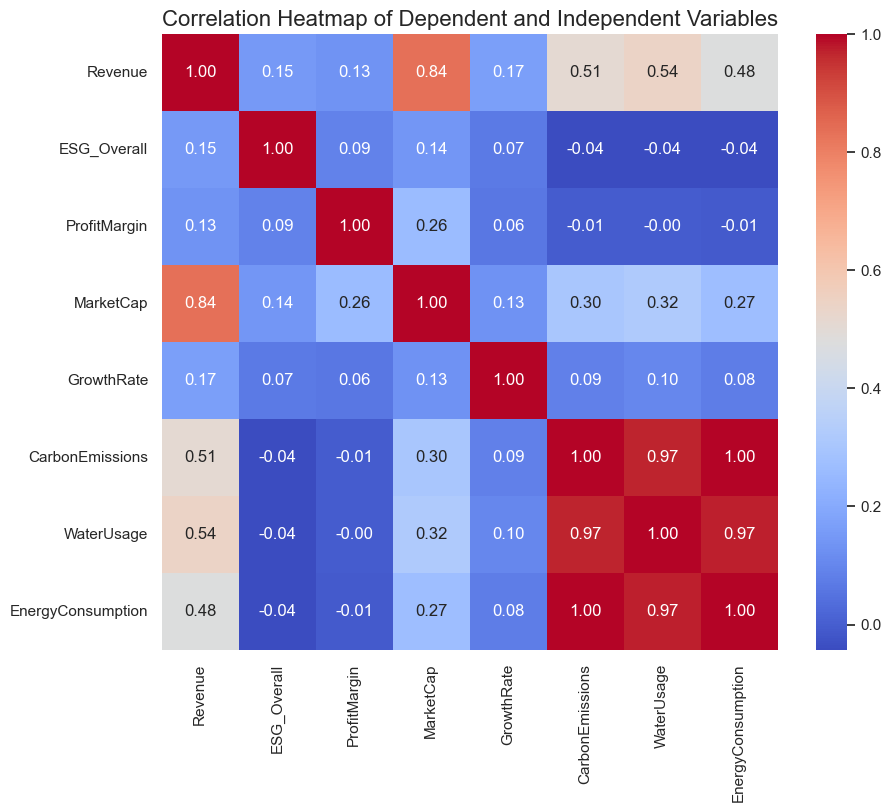

In [ ]:
# Select the columns you want to include in the correlation
# For example, dependent variables: ESG_Overall, Revenue
# Independent variables: ProfitMargin, MarketCap, GrowthRate, CarbonEmissions, WaterUsage, EnergyConsumption
cols_to_corr = [
    'Revenue', 'ESG_Overall',    # dependent
    'ProfitMargin', 'MarketCap', 'GrowthRate',
    'CarbonEmissions', 'WaterUsage', 'EnergyConsumption'
]

# Compute correlation matrix
corr_matrix = df[cols_to_corr].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title("Correlation Heatmap of Dependent and Independent Variables", fontsize=16)
plt.show()


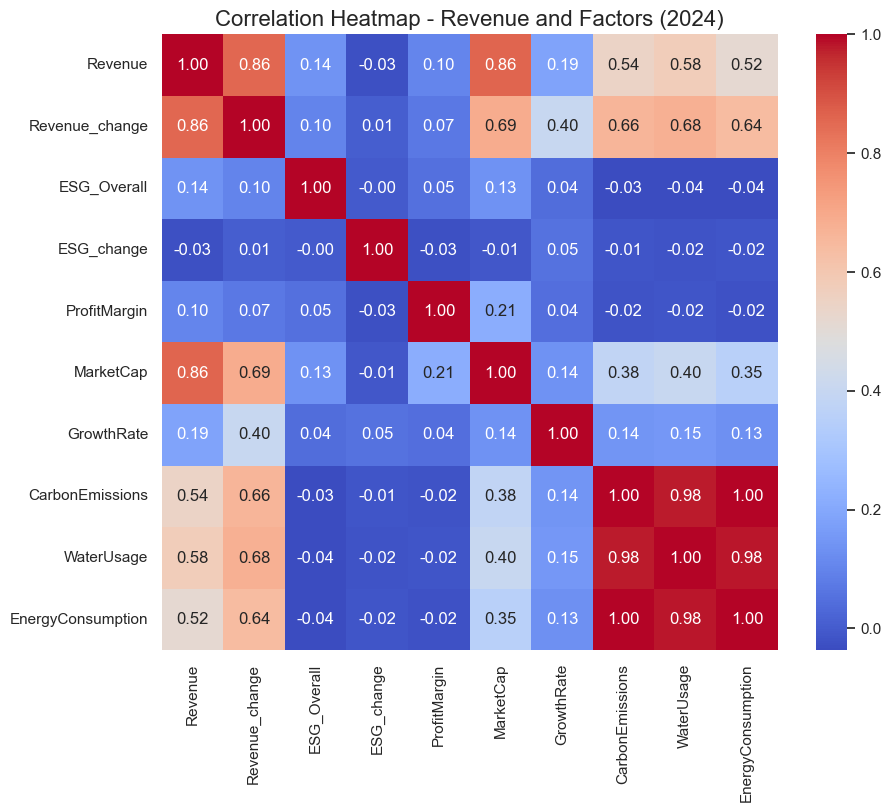

In [ ]:
# Select relevant numeric columns
# Include Revenue, ESG_Overall, ESG_change, Revenue_change, ProfitMargin, MarketCap, GrowthRate, CarbonEmissions, WaterUsage, EnergyConsumption
cols_to_corr = [
    'Revenue', 'Revenue_change', 'ESG_Overall', 'ESG_change',
    'ProfitMargin', 'MarketCap', 'GrowthRate',
    'CarbonEmissions', 'WaterUsage', 'EnergyConsumption'
]

# Compute correlation matrix
corr_matrix = df_2024[cols_to_corr].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title("Correlation Heatmap - Revenue and Factors (2024)", fontsize=16)
plt.show()


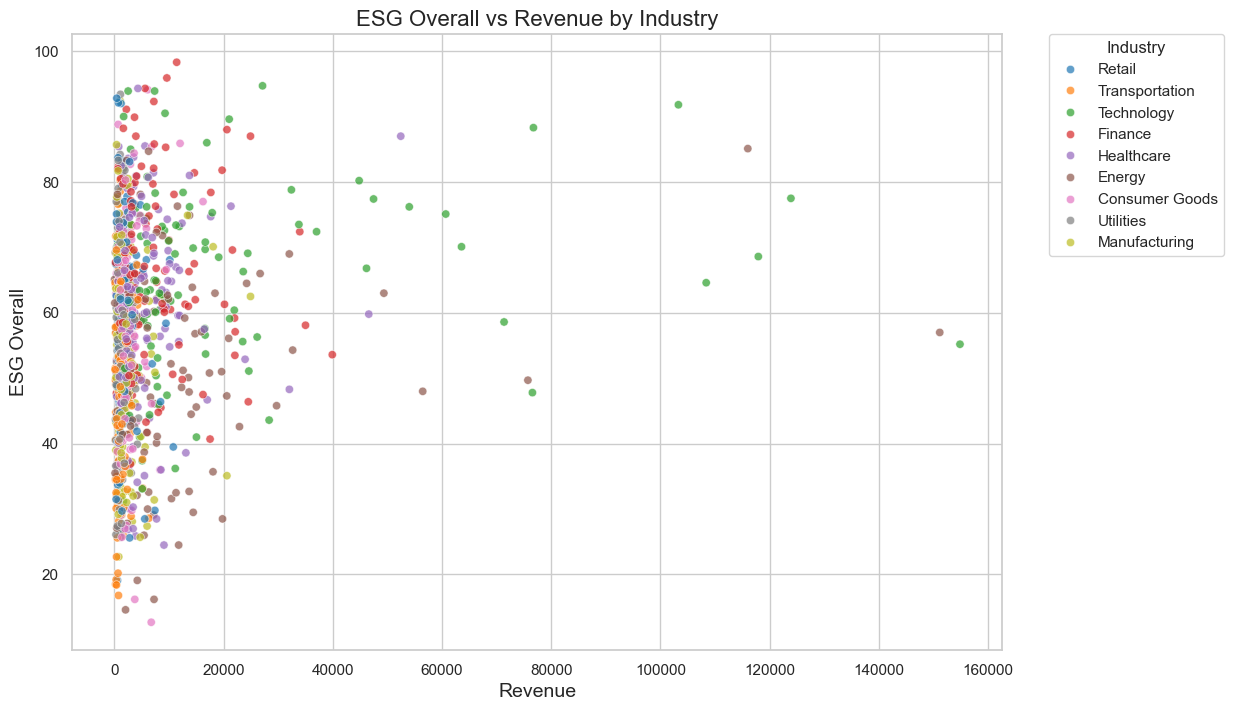

In [ ]:
sns.set(style="whitegrid")

# 按 Industry 绘制散点图
plt.figure(figsize=(12,8))
scatter_plot = sns.scatterplot(
    data=df_2024,
    x="Revenue",
    y="ESG_Overall",
    hue="Industry",        # 按行业区分颜色
    palette="tab10",       # 调色板，可根据行业数量调整
    alpha=0.7               # 透明度，便于观察重叠点
)

# 添加标题和标签
plt.title("ESG Overall vs Revenue by Industry", fontsize=16)
plt.xlabel("Revenue", fontsize=14)
plt.ylabel("ESG Overall", fontsize=14)

# 优化图例
plt.legend(title="Industry", bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()


<Axes: xlabel='ESG_Overall', ylabel='Revenue'>

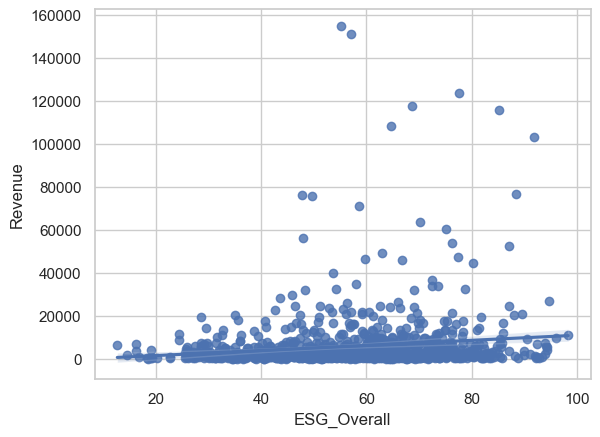

In [85]:
sns.regplot(x='ESG_Overall', y='Revenue', data=df_2024)


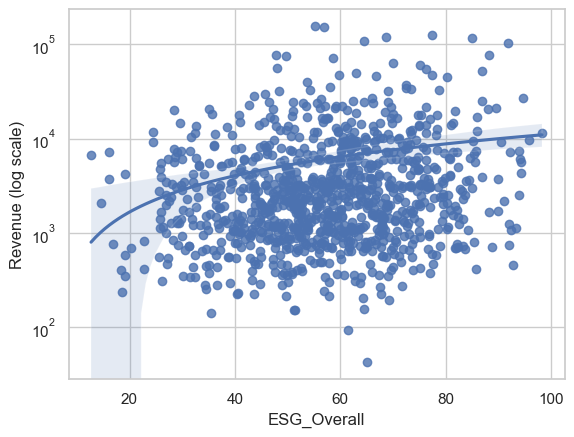

In [ ]:
sns.regplot(x='ESG_Overall', y='Revenue', data=df_2024)
plt.yscale('log')  # set y-axis to logarithmic
plt.ylabel('Revenue (log scale)')
plt.show()

#There is a weak positive correlation, but it is non-linear.

<Axes: ylabel='Revenue'>

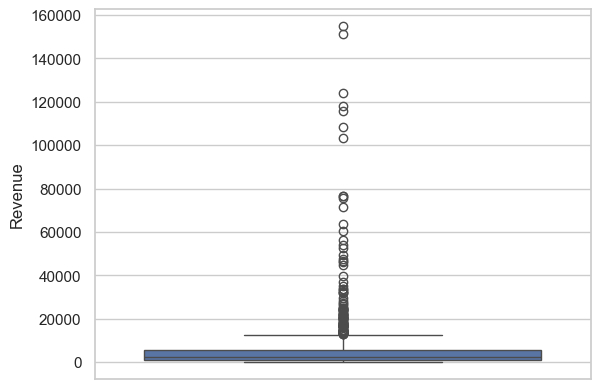

In [91]:
sns.boxplot(y=df_2024['Revenue'])